<div style="text-align: center; padding: 20px; border-radius: 15px; background: linear-gradient(135deg, #e0f7fa, #b2ebf2); box-shadow: 0 4px 10px rgba(0,0,0,0.1);">
  <h1 style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color: #00796b; font-size: 32px; margin-bottom: 10px;">
     TP 1 et TP 2
  </h1>
  <h2 style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color: #004d40; font-size: 20px;">
     Oumaima el alami IID-3
  </h2>
</div>


# **TP1: Logique floue**

# Exercice 1:

In [39]:
import numpy as np
import matplotlib.pyplot as plt

1. Définir la variable floue « Distance_to_next_car  » sur l’univers de discours [0, 30].   

In [40]:
x = np.linspace(0, 30, 601)  

2. Créer cinq ensembles flous correspondants aux termes linguistiques suivants :   

- **v_small (très petite distance)**  
- **small (petite distance)**  
- **perfect (distance idéale)**  
- **big (grande distance)**  
- **v_big (très grande distance)**  

In [41]:
def trapmf(x, params):
    a, b, c, d = params
    y = np.zeros_like(x, dtype=float)
    # 1-montée
    idx = (x >= a) & (x < b)
    if b > a:
        y[idx] = (x[idx] - a) / (b - a)
    # 2-plateau
    idx = (x >= b) & (x <= c)
    y[idx] = 1.0
    # 3-descente
    idx = (x > c) & (x <= d)
    if d > c:
        y[idx] = (d - x[idx]) / (d - c)
    return np.clip(y, 0, 1)

def trimf(x, params):
    a, b, c = params
    y = np.zeros_like(x, dtype=float)
    # 1-montée
    idx = (x >= a) & (x < b)
    if b > a:
        y[idx] = (x[idx] - a) / (b - a)
    # 2-plateau
    idx = (x >= b) & (x <= c)
    if c > b:
        y[idx] = (c - x[idx]) / (c - b)
    return np.clip(y, 0, 1)

In [42]:
params = {
    "v_small": ("trapézoïde", [0, 0, 3, 7]),
    "small":   ("triangle",   [3, 7, 11]),
    "perfect": ("triangle",   [9, 15, 21]),
    "big":     ("triangle",   [13, 19, 25]),
    "v_big":   ("trapézoïde", [21, 27, 30, 30]),
}

3. Utiliser des fonctions d’appartenance trapézoïdales et triangulaires pour modéliser ces ensembles flous, avec les paramètres numériques appropriés.    

In [43]:
mu_v_small = trapmf(x, params["v_small"][1])
mu_small   = trimf(x, params["small"][1])
mu_perfect = trimf(x, params["perfect"][1])
mu_big     = trimf(x, params["big"][1])
mu_v_big   = trapmf(x, params["v_big"][1])

4.  Visualiser les fonctions d’appartenance obtenues.    

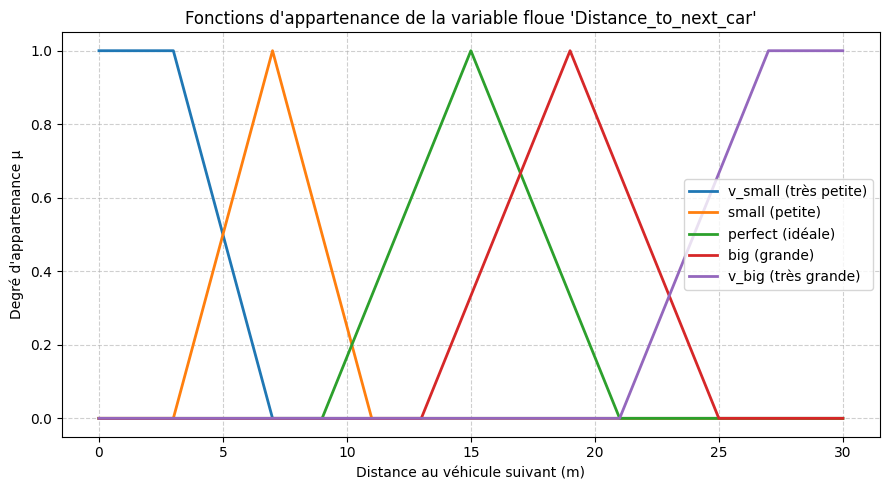

In [44]:
plt.figure(figsize=(9,5))
plt.plot(x, mu_v_small, label="v_small (très petite)", linewidth=2)
plt.plot(x, mu_small,   label="small (petite)", linewidth=2)
plt.plot(x, mu_perfect, label="perfect (idéale)", linewidth=2)
plt.plot(x, mu_big,     label="big (grande)", linewidth=2)
plt.plot(x, mu_v_big,   label="v_big (très grande)", linewidth=2)

plt.title("Fonctions d'appartenance de la variable floue 'Distance_to_next_car'")
plt.xlabel("Distance au véhicule suivant (m)")
plt.ylabel("Degré d'appartenance μ")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Exercice 2:

1. Définir la variable floue Speed_change sur l’univers de discours [ -20, 20].   

In [45]:
x = np.linspace(-20, 20, 201)  


2. Créer trois ensembles flous correspondant aux termes linguistiques suivants :   
✓ declining (vitesse en diminution),   
✓ constant (vitesse stable),   
✓ growing (vitesse en augmentation). 

In [46]:
def trapmf(x, params):
  a, b, c, d = params
  y = np.zeros_like(x, dtype=float)
  # montée (a -> b)
  idx = (x >= a) & (x < b)
  if b > a:
    y[idx] = (x[idx] - a) / (b - a)
  # plateau (b -> c)
  idx = (x >= b) & (x <= c)
  y[idx] = 1.0
  # descente (c -> d)
  idx = (x > c) & (x <= d)
  if d > c:
    y[idx] = (d - x[idx]) / (d - c)
  return np.clip(y, 0, 1)

def trimf(x, params):
  a, b, c = params
  y = np.zeros_like(x, dtype=float)
  # montée (a -> b)
  idx = (x >= a) & (x < b)
  if b > a:
    y[idx] = (x[idx] - a) / (b - a)
  # descente (b -> c)
  idx = (x >= b) & (x <= c)
  if c > b:
    y[idx] = (c - x[idx]) / (c - b)
  return np.clip(y, 0, 1)


In [47]:
params = {
    "declining": ("trapézoïde", [-20, -20, -10, -2]),
    "constant":  ("triangle",   [-5, 0, 5]),
    "growing":   ("trapézoïde", [2, 10, 20, 20]),
}


3. Utiliser des fonctions d’appartenance trapézoïdales et triangulaires pour représenter ces ensembles flous.   

In [48]:
mu_declining = trapmf(x, params["declining"][1])
mu_constant  = trimf(x, params["constant"][1])
mu_growing   = trapmf(x, params["growing"][1])

4. Tracer les fonctions d’appartenance de la variable Speed_change   

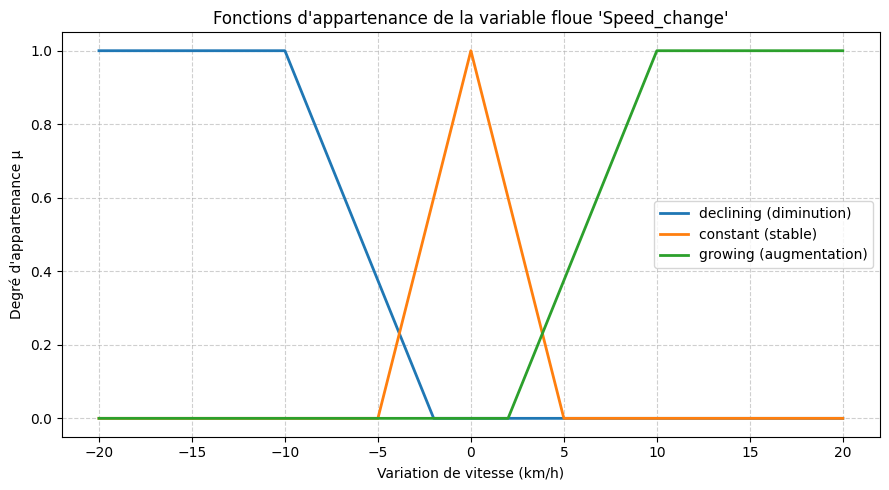

In [49]:
plt.figure(figsize=(9,5))
plt.plot(x, mu_declining, label="declining (diminution)", linewidth=2)
plt.plot(x, mu_constant,  label="constant (stable)", linewidth=2)
plt.plot(x, mu_growing,   label="growing (augmentation)", linewidth=2)

plt.title("Fonctions d'appartenance de la variable floue 'Speed_change'")
plt.xlabel("Variation de vitesse (km/h)")
plt.ylabel("Degré d'appartenance μ")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


# Exercice 3:

1. Définir la variable floue de sortie Acceleration_Adjust sur l’univers de discours [ -3,3].   


In [50]:
x = np.linspace(-3.0, 3.0, 601)  

2. Créer cinq ensembles flous correspondant aux termes linguistiques suivants :   
✓ neg_big (forte décélération),   
✓ neg_small (faible décélération),   
✓ zero (aucune variation),   
✓ pos_small (faible accélération),   
✓ pos_big (forte accélération).   

In [51]:

def trapmf(x, params):
    a, b, c, d = params
    y = np.zeros_like(x, dtype=float)
    # montée (a -> b)
    idx = (x >= a) & (x < b)
    if b > a:
        y[idx] = (x[idx] - a) / (b - a)
    # plateau (b -> c)
    idx = (x >= b) & (x <= c)
    y[idx] = 1.0
    # descente (c -> d)
    idx = (x > c) & (x <= d)
    if d > c:
        y[idx] = (d - x[idx]) / (d - c)
    return np.clip(y, 0.0, 1.0)

def trimf(x, params):
    a, b, c = params
    y = np.zeros_like(x, dtype=float)
    # montée (a -> b)
    idx = (x >= a) & (x < b)
    if b > a:
        y[idx] = (x[idx] - a) / (b - a)
    # descente (b -> c)
    idx = (x >= b) & (x <= c)
    if c > b:
        y[idx] = (c - x[idx]) / (c - b)
    return np.clip(y, 0.0, 1.0)


- Paramètres des ensembles flous 

In [52]:
params = {
    "neg_big":   ("trapézoïde", [-3.0, -3.0, -2.0, -1.0]),
    "neg_small": ("triangle",   [-2.0, -1.0,  0.0]),
    "zero":      ("triangle",   [-0.5,  0.0,  0.5]),
    "pos_small": ("triangle",   [ 0.0,  1.0,  2.0]),
    "pos_big":   ("trapézoïde", [ 1.0,  2.0,  3.0,  3.0]),
}


3. Utiliser des fonctions d’appartenance trapézoïdales et triangulaires pour modéliser ces ensembles flous.   

- Calcul des degrés d'appartenance

In [53]:
mu = {}
mu["neg_big"]   = trapmf(x, params["neg_big"][1])
mu["neg_small"] = trimf(x, params["neg_small"][1])
mu["zero"]      = trimf(x, params["zero"][1])
mu["pos_small"] = trimf(x, params["pos_small"][1])
mu["pos_big"]   = trapmf(x, params["pos_big"][1])


5. Visualiser les fonctions d’appartenance obtenues.   

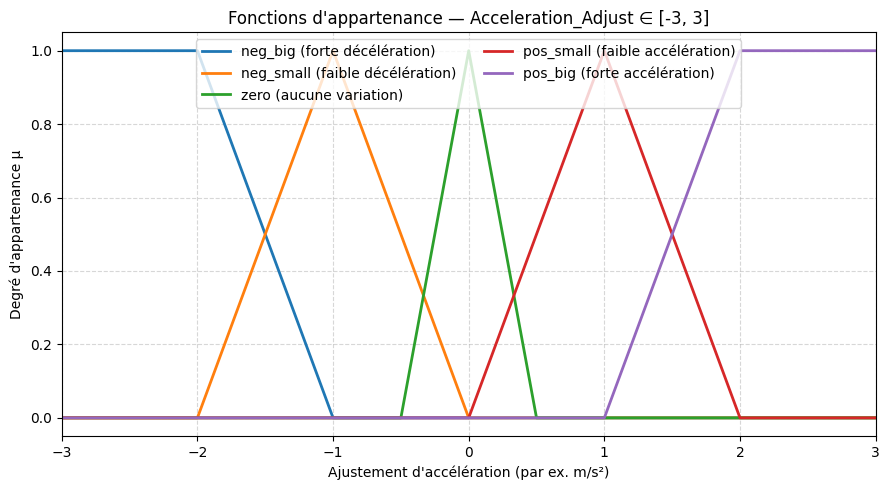

In [54]:
plt.figure(figsize=(9,5))
plt.plot(x, mu["neg_big"],   label="neg_big (forte décélération)", linewidth=2)
plt.plot(x, mu["neg_small"], label="neg_small (faible décélération)", linewidth=2)
plt.plot(x, mu["zero"],      label="zero (aucune variation)", linewidth=2)
plt.plot(x, mu["pos_small"], label="pos_small (faible accélération)", linewidth=2)
plt.plot(x, mu["pos_big"],   label="pos_big (forte accélération)", linewidth=2)

plt.title("Fonctions d'appartenance — Acceleration_Adjust ∈ [-3, 3]")
plt.xlabel("Ajustement d'accélération (par ex. m/s²)")
plt.ylabel("Degré d'appartenance μ")
plt.xlim(-3, 3)
plt.ylim(-0.05, 1.05)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(loc="upper center", ncol=2)
plt.tight_layout()
plt.show()

# Exercice 4 :

In [55]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl

1. Implémenter les règles suivantes à l’aide de ctrl.Rule et construire le système de contrôle flou (ControlSystem) associé.   

In [56]:
Distance_to_next_car = ctrl.Antecedent(np.linspace(0, 30, 601), 'Distance_to_next_car')
Speed_change = ctrl.Antecedent(np.linspace(-20, 20, 601), 'Speed_change')

Acceleration_Adjust = ctrl.Consequent(np.linspace(-3, 3, 601), 'Acceleration_Adjust')

In [57]:
Distance_to_next_car['v_small'] = fuzz.trapmf(Distance_to_next_car.universe, [0, 0, 3, 7])
Distance_to_next_car['small']   = fuzz.trimf(Distance_to_next_car.universe, [3, 7, 11])
Distance_to_next_car['perfect'] = fuzz.trimf(Distance_to_next_car.universe, [9, 15, 21])
Distance_to_next_car['big']     = fuzz.trimf(Distance_to_next_car.universe, [13, 19, 25])
Distance_to_next_car['v_big']   = fuzz.trapmf(Distance_to_next_car.universe, [21, 27, 30, 30])

In [58]:
Speed_change['declining'] = fuzz.trapmf(Speed_change.universe, [-20, -20, -10, -2])
Speed_change['constant']  = fuzz.trimf(Speed_change.universe, [-5, 0, 5])
Speed_change['growing']   = fuzz.trapmf(Speed_change.universe, [2, 10, 20, 20])

In [59]:
Acceleration_Adjust['neg_big']   = fuzz.trapmf(Acceleration_Adjust.universe, [-3, -3, -2, -1])
Acceleration_Adjust['neg_small'] = fuzz.trimf(Acceleration_Adjust.universe, [-2, -1, 0])
Acceleration_Adjust['zero']      = fuzz.trimf(Acceleration_Adjust.universe, [-0.5, 0, 0.5])
Acceleration_Adjust['pos_small'] = fuzz.trimf(Acceleration_Adjust.universe, [0, 1, 2])
Acceleration_Adjust['pos_big']   = fuzz.trapmf(Acceleration_Adjust.universe, [1, 2, 3, 3])

In [60]:
rule1  = ctrl.Rule(Distance_to_next_car['v_small'] & Speed_change['declining'], Acceleration_Adjust['neg_small'])
rule2  = ctrl.Rule(Distance_to_next_car['v_small'] & Speed_change['constant'],  Acceleration_Adjust['neg_big'])
rule3  = ctrl.Rule(Distance_to_next_car['v_small'] & Speed_change['growing'],   Acceleration_Adjust['neg_big'])

In [61]:
rule4  = ctrl.Rule(Distance_to_next_car['small'] & Speed_change['declining'], Acceleration_Adjust['zero'])
rule5  = ctrl.Rule(Distance_to_next_car['small'] & Speed_change['constant'],  Acceleration_Adjust['neg_small'])
rule6  = ctrl.Rule(Distance_to_next_car['small'] & Speed_change['growing'],   Acceleration_Adjust['neg_big'])

In [62]:
rule7  = ctrl.Rule(Distance_to_next_car['perfect'] & Speed_change['declining'], Acceleration_Adjust['pos_small'])
rule8  = ctrl.Rule(Distance_to_next_car['perfect'] & Speed_change['constant'],  Acceleration_Adjust['zero'])
rule9  = ctrl.Rule(Distance_to_next_car['perfect'] & Speed_change['growing'],   Acceleration_Adjust['neg_small'])

In [63]:
rule10 = ctrl.Rule(Distance_to_next_car['big'] & Speed_change['declining'], Acceleration_Adjust['pos_big'])
rule11 = ctrl.Rule(Distance_to_next_car['big'] & Speed_change['constant'],  Acceleration_Adjust['pos_small'])
rule12 = ctrl.Rule(Distance_to_next_car['big'] & Speed_change['growing'],   Acceleration_Adjust['zero'])

In [64]:
rule13 = ctrl.Rule(Distance_to_next_car['v_big'] & Speed_change['declining'], Acceleration_Adjust['pos_big'])
rule14 = ctrl.Rule(Distance_to_next_car['v_big'] & Speed_change['constant'],  Acceleration_Adjust['pos_big'])
rule15 = ctrl.Rule(Distance_to_next_car['v_big'] & Speed_change['growing'],   Acceleration_Adjust['pos_small'])

In [65]:
speed_control_system = ctrl.ControlSystem([
    rule1, rule2, rule3,
    rule4, rule5, rule6,
    rule7, rule8, rule9,
    rule10, rule11, rule12,
    rule13, rule14, rule15
])

In [66]:
speed_sim = ctrl.ControlSystemSimulation(speed_control_system) 

2. Simuler le fonctionnement du système pour les valeurs d’entrée suivantes :   
✓ Distance_to_next_car = 13  
✓ Speed_change = –2.5  

In [67]:
speed_sim.input['Distance_to_next_car'] = 13
speed_sim.input['Speed_change'] = -2.5

speed_sim.compute()

3. Calculer la valeur de sortie Acceleration_Adjust à l’aide de ControlSystemSimulation, afficher le résultat numérique, et visualiser graphiquement le résultat de la défuzzification.   

Valeur simulée de 'Acceleration_Adjust' : 0.243


C:\Users\34602\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


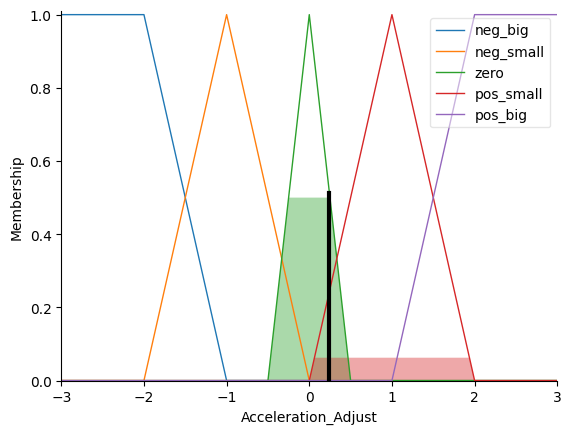

In [68]:
print(f"Valeur simulée de 'Acceleration_Adjust' : {speed_sim.output['Acceleration_Adjust']:.3f}")
Acceleration_Adjust.view(sim=speed_sim)
plt.show()

# **TP2: Logique floue et intégration du ML**

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd

In [70]:
Distance_to_next_car = ctrl.Antecedent(np.linspace(0, 30, 601), 'Distance_to_next_car')
Speed_change = ctrl.Antecedent(np.linspace(-20, 20, 601), 'Speed_change')
Acceleration_Adjust = ctrl.Consequent(np.linspace(-3, 3, 601), 'Acceleration_Adjust')

In [71]:
Distance_to_next_car['v_small'] = fuzz.trapmf(Distance_to_next_car.universe, [0, 0, 3, 7])
Distance_to_next_car['small']   = fuzz.trimf(Distance_to_next_car.universe, [3, 7, 11])
Distance_to_next_car['perfect'] = fuzz.trimf(Distance_to_next_car.universe, [9, 15, 21])
Distance_to_next_car['big']     = fuzz.trimf(Distance_to_next_car.universe, [13, 19, 25])
Distance_to_next_car['v_big']   = fuzz.trapmf(Distance_to_next_car.universe, [21, 27, 30, 30])

In [72]:
Speed_change['declining'] = fuzz.trapmf(Speed_change.universe, [-20, -20, -10, -2])
Speed_change['constant']  = fuzz.trimf(Speed_change.universe, [-5, 0, 5])
Speed_change['growing']   = fuzz.trapmf(Speed_change.universe, [2, 10, 20, 20])

In [73]:
Acceleration_Adjust['neg_big']   = fuzz.trapmf(Acceleration_Adjust.universe, [-3, -3, -2, -1])
Acceleration_Adjust['neg_small'] = fuzz.trimf(Acceleration_Adjust.universe, [-2, -1, 0])
Acceleration_Adjust['zero']      = fuzz.trimf(Acceleration_Adjust.universe, [-0.5, 0, 0.5])
Acceleration_Adjust['pos_small'] = fuzz.trimf(Acceleration_Adjust.universe, [0, 1, 2])
Acceleration_Adjust['pos_big']   = fuzz.trapmf(Acceleration_Adjust.universe, [1, 2, 3, 3])

In [74]:
rules = [
    ctrl.Rule(Distance_to_next_car['v_small'] & Speed_change['declining'], Acceleration_Adjust['neg_small']),
    ctrl.Rule(Distance_to_next_car['v_small'] & Speed_change['constant'],  Acceleration_Adjust['neg_big']),
    ctrl.Rule(Distance_to_next_car['v_small'] & Speed_change['growing'],   Acceleration_Adjust['neg_big']),
    ctrl.Rule(Distance_to_next_car['small'] & Speed_change['declining'],   Acceleration_Adjust['zero']),
    ctrl.Rule(Distance_to_next_car['small'] & Speed_change['constant'],    Acceleration_Adjust['neg_small']),
    ctrl.Rule(Distance_to_next_car['small'] & Speed_change['growing'],     Acceleration_Adjust['neg_big']),
    ctrl.Rule(Distance_to_next_car['perfect'] & Speed_change['declining'], Acceleration_Adjust['pos_small']),
    ctrl.Rule(Distance_to_next_car['perfect'] & Speed_change['constant'],  Acceleration_Adjust['zero']),
    ctrl.Rule(Distance_to_next_car['perfect'] & Speed_change['growing'],   Acceleration_Adjust['neg_small']),
    ctrl.Rule(Distance_to_next_car['big'] & Speed_change['declining'],     Acceleration_Adjust['pos_big']),
    ctrl.Rule(Distance_to_next_car['big'] & Speed_change['constant'],      Acceleration_Adjust['pos_small']),
    ctrl.Rule(Distance_to_next_car['big'] & Speed_change['growing'],       Acceleration_Adjust['zero']),
    ctrl.Rule(Distance_to_next_car['v_big'] & Speed_change['declining'],   Acceleration_Adjust['pos_big']),
    ctrl.Rule(Distance_to_next_car['v_big'] & Speed_change['constant'],    Acceleration_Adjust['pos_big']),
    ctrl.Rule(Distance_to_next_car['v_big'] & Speed_change['growing'],     Acceleration_Adjust['pos_small'])
]

In [75]:
system = ctrl.ControlSystem(rules)
sim = ctrl.ControlSystemSimulation(system)

In [76]:
np.random.seed(42)
n_samples = 1000

distances = np.random.uniform(0, 30, n_samples)
speeds = np.random.uniform(-20, 20, n_samples)
outputs = []

for d, s in zip(distances, speeds):
    sim.input['Distance_to_next_car'] = d
    sim.input['Speed_change'] = s
    sim.compute()
    outputs.append(sim.output['Acceleration_Adjust'])

data = pd.DataFrame({
    'Distance_to_next_car': distances,
    'Speed_change': speeds,
    'Acceleration_Adjust': outputs
})

print("Jeu de données généré :", data.head())

X = data[['Distance_to_next_car', 'Speed_change']]
y = data['Acceleration_Adjust']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\n Évaluation du modèle ML :")
print(f"MAE : {mae:.4f}")
print(f"MSE : {mse:.4f}")


Jeu de données généré :    Distance_to_next_car  Speed_change  Acceleration_Adjust
0             11.236204    -12.594683             1.000000
1             28.521429      1.676038             2.155156
2             21.959818     14.917833             0.454439
3             17.959755      9.288995            -0.633260
4              4.680559     12.262446            -2.136772

 Évaluation du modèle ML :
MAE : 0.0301
MSE : 0.0039


### **Comparaison des approches :**

1. Logique floue :
   - Basée sur des règles explicites et interprétables
   - Permet un contrôle précis et transparent
   - Facilement modifiable et ajustable
   - Robuste aux variations des données

2. Machine Learning (Random Forest) :
   - Apprentissage automatique à partir des données
   - MAE : 0.0301
   - MSE : 0.0039
   - Plus adaptatif mais moins transparent
   - Nécessite un jeu de données d'entraînement
